Modules

In [13]:
import biota.steadyfluxesA as steady
import matplotlib.pyplot as plt

---------------------------------------------

Specify bioreactor parameters and construct bioreactor class instance from them.
Values are derived from the 20,000 litre stirred aerated tank example case from Humbird https://doi.org/10.31224/osf.io/795su . Fed batch operation is considered here, no perfusion.

In [14]:
workingVolume = 20000
tankDiameter = 2.34
impellerDiameter = tankDiameter/3
rpm = 40
backPressure = 1.3
superficialVel = 0.004
moleFracO2 = 0.21
moleFracCO2 = 0.03
initVol = 0.76 * workingVolume
initCells = 0.6e6
temp = 310
powerNumber = 5
mediumDensity = 1000
mediumViscosity = 8e-4
vesselVolDay = 0.0
perfLactateRate = 5.0
perfAmmrate = 5.0

STR_Humbird_20kl = steady.Bioreactor(wv=workingVolume,t=tankDiameter,d=impellerDiameter,n=rpm,p_back=backPressure,u_s=superficialVel,mf_O2_gas=moleFracO2,mf_CO2_gas=moleFracCO2,v0=initVol,ns=initCells,Temp=temp,
                                     Np=powerNumber,rho=mediumDensity,mu=mediumViscosity,vvd=vesselVolDay,perfAMM=perfAmmrate,perfLAC=perfLactateRate)


-----------------------------------------

Specify cell parameters and create instance of cell class from them. Values are derived from the un-enhanced CHO model of Humbird https://doi.org/10.31224/osf.io/795su for the two doublings production scenario.

In [15]:
growthRate = 0.029

glutamineUptakeRate = 0
glucoseUptakeRate = 0
oxygenUptakeRate = 0.49
uptakeList = [glutamineUptakeRate, glucoseUptakeRate, oxygenUptakeRate]

carbonDioxideProdRate = 0.59
ammoniaProductionRate = 0.092
lactateProductionRate = 0.624
prodList = [carbonDioxideProdRate, ammoniaProductionRate, lactateProductionRate]

massDensity = 1030
cellRadius = 18e-6
wetmass = 3000
dryMassFraction = 0.3

ammoniaLimit = 5
lactateLimit = 50
CO2Limit = 100
turbLengthLimit = 20e-6
limitsList = [ammoniaLimit, lactateLimit, CO2Limit, turbLengthLimit]


cell_Humbird = steady.Cell(mu=growthRate,uptakes=uptakeList,prod=prodList,rho=massDensity,rad=cellRadius,wetmass=wetmass,dmf=dryMassFraction,limits=limitsList)

-------------------------------------------------

Execute production performance function 

In [16]:
def tauMModel():
    return 3

a = steady.yieldModels(STR_Humbird_20kl,cell_Humbird,144,False,False,False)

[9.27064819 9.27062475 9.2706013  ... 5.72385924 5.72237424 5.72088865]


-------------------------------------------------------------------

Dataframe returned by production performance function

In [17]:
a

{'CO2': 117.18884165659293,
 'O2': 49.44884891851872,
 'Mixing O2': 62.60883340600739,
 'Superficial Velocity Top': 117.18884165659293,
 'Stress': 117.18884165659293}

-------------------------------------------------

Look at constraints individually to see the limited duration and yield for each of them. Output is in the form:
constraint (duration \[hrs\], yield \[wet g/L\])

In [18]:
for i in range(0,len(c)):
    print (b[i],c[i]) 

NameError: name 'c' is not defined

--------------------------------------------------------

Plot key constraints against time, in the same format as Figure 2.7 (page 27) of https://doi.org/10.31224/osf.io/795su <br>
Code modified from https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

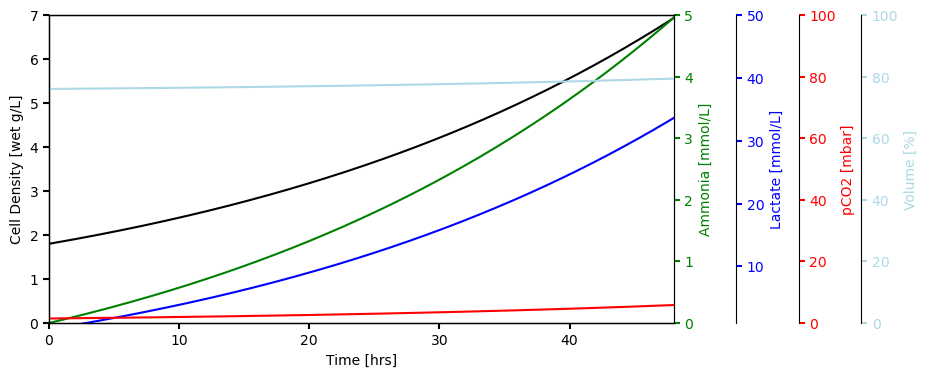

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
twin4.spines.right.set_position(("axes", 1.3))

p1, = ax.plot(a['Time [hr]'],a['Cell Density [wet g/L]'], "black")
p2, = twin1.plot(a['Time [hr]'],a['Ammonia [mmol/L]'], "green")
p3, = twin2.plot(a['Time [hr]'],a['Lactate [mmol/L]'], "blue")
p4, = twin3.plot(a['Time [hr]'],a['pCO2 [mbar]'], "red")
p5, = twin4.plot(a['Time [hr]'],a['Volume [L]']/workingVolume*100, "lightblue")

ax.set_xlim(0, 48)
ax.set_ylim(0, 7)
twin1.set_ylim(0, 5)
twin2.set_ylim(1, 50)
twin3.set_ylim(0, 100)
twin4.set_ylim(0, 100)

ax.set_xlabel("Time [hrs]")
ax.set_ylabel("Cell Density [wet g/L]")
twin1.set_ylabel("Ammonia [mmol/L]")
twin2.set_ylabel("Lactate [mmol/L]")
twin3.set_ylabel("pCO2 [mbar]")
twin4.set_ylabel("Volume [%]")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
twin4.yaxis.label.set_color(p5.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
twin3.tick_params(axis='y', colors=p4.get_color(), **tkw)
twin4.tick_params(axis='y', colors=p5.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

#ax.legend(handles=[p1, p2, p3])

plt.show()

------------------------------